## Importing all necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [2]:
%matplotlib inline
plt.style.use('ggplot')

## Importing the data.

In [3]:
data1 = pd.read_csv('exams1.csv')
data2 = pd.read_csv('exams2.csv')
data3 = pd.read_csv('exams3.csv')
data4 = pd.read_csv('exams4.csv')

In [4]:
data = pd.concat([data1,data2,data3,data4], axis=0)

In [5]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,associate's degree,standard,completed,71,61,67
1,female,group B,associate's degree,free/reduced,none,51,55,50
2,female,group E,bachelor's degree,free/reduced,completed,76,86,81
3,male,group C,some college,free/reduced,completed,41,52,40
4,male,group D,associate's degree,standard,none,85,76,75


## Relationship between reading score and the mean of reading and writing scores.

In [6]:
data['rea,wri'] = (data['reading score']+data['writing score'])/2

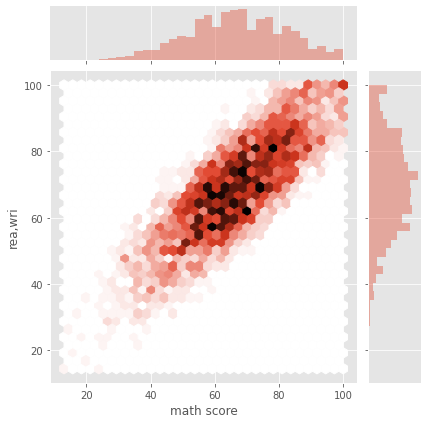

In [7]:
sns.jointplot(data['math score'],data['rea,wri'], kind='hex')

In [8]:
data.drop('rea,wri',axis=1,inplace=True)
data['gender'] = pd.get_dummies(data['gender'],drop_first=True)
race = pd.get_dummies(data['race/ethnicity'], drop_first=True)
par = pd.get_dummies(data['parental level of education'], drop_first=True)
lun = pd.get_dummies(data['lunch'], drop_first=True)
test_pr = pd.get_dummies(data['test preparation course'], drop_first=True)
data.drop(['race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'], axis=1, inplace=True)
data = pd.concat([data, race, par, lun, test_pr], axis=1)

In [9]:
data.head()

,gender,math score,reading score,writing score,group B,group C,group D,group E,bachelor's degree,high school,master's degree,some college,some high school,standard,none
0,0,71,61,67,0,0,1,0,0,0,0,0,0,1,0
1,0,51,55,50,1,0,0,0,0,0,0,0,0,0,1
2,0,76,86,81,0,0,0,1,1,0,0,0,0,0,0
3,1,41,52,40,0,1,0,0,0,0,0,1,0,0,0
4,1,85,76,75,0,0,1,0,0,0,0,0,0,1,1


In [10]:
X = data.drop('gender', axis=1)
y = data['gender']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## After splitting train and test data, let's create the support vector machine and parameter dictionary. Then use GridSearchCv to choose the best parameters.

In [12]:
svc = SVC()
parameter = {'C':[0.1,1,10,100], 'gamma':[1,0.1,0.01,0.001], 'kernel':['rbf']}

In [13]:
gr = GridSearchCV(SVC(), param_grid=parameter, refit=True, verbose=2)
gr.fit(X_train,y_train)

C:\Users\90538\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    8.1s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

## We can now use the best parameters and then predict the values.

In [14]:
gr.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [15]:
gr_pred = gr.predict(X_test)

In [16]:
print(classification_report(y_test, gr_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       612
           1       0.91      0.89      0.90       588

    accuracy                           0.90      1200
   macro avg       0.90      0.90      0.90      1200
weighted avg       0.90      0.90      0.90      1200

